## 安裝套件

In [1]:
!pip install -q requests

In [2]:
!pip install feedparser

In [3]:
!pip install lxml

In [4]:
!pip install jieba

### 下載繁體字的辭典檔

In [5]:
!wget https://github.com/fxsjy/jieba/raw/master/extra_dict/dict.txt.big -O jieba_data/dict.txt.big

--2023-04-22 16:15:03--  https://github.com/fxsjy/jieba/raw/master/extra_dict/dict.txt.big
Resolving github.com (github.com)... 20.27.177.113, ::ffff:20.27.177.113
Connecting to github.com (github.com)|20.27.177.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/fxsjy/jieba/master/extra_dict/dict.txt.big [following]
--2023-04-22 16:15:04--  https://raw.githubusercontent.com/fxsjy/jieba/master/extra_dict/dict.txt.big
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... ::ffff:185.199.111.133, ::ffff:185.199.109.133, ::ffff:185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|::ffff:185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8583143 (8.2M) [text/plain]
Saving to: ‘jieba_data/dict.txt.big’

jieba_data/dict.txt 100%[===================>]   8.18M  3.78MB/s    in 2.2s    

2023-04-22 16:15:06 (3.78 MB/s) - ‘jieba_data/dict.txt.big’

In [6]:
!pip install wordcloud

## 解析 RSS

In [7]:
import feedparser

In [8]:
#rss_url = "https://money.udn.com/rssfeed/news/1001/5588/10511?ch=money"

In [9]:
rss_url = "https://money.udn.com/rssfeed/news/1001/5588/5599?ch=money"

In [10]:
newsFeed = feedparser.parse(rss_url)
newsFeed

{'bozo': False,
 'entries': [{'title': '澳洲放寬紐西蘭人取得公民身分 約38萬人受惠',
   'title_detail': {'type': 'text/plain',
    'language': None,
    'base': 'https://money.udn.com/rssfeed/news/1001/5588/5599?ch=money',
    'value': '澳洲放寬紐西蘭人取得公民身分 約38萬人受惠'},
   'links': [{'rel': 'alternate',
     'type': 'text/html',
     'href': 'https://money.udn.com/money/story/5599/7116315'}],
   'link': 'https://money.udn.com/money/story/5599/7116315',
   'published': 'Sat, 22 Apr 2023 15:54:32 +0800',
   'published_parsed': time.struct_time(tm_year=2023, tm_mon=4, tm_mday=22, tm_hour=7, tm_min=54, tm_sec=32, tm_wday=5, tm_yday=112, tm_isdst=0),
   'summary': '澳洲今天宣布將讓數十萬名紐西蘭人更容易取得澳洲公民身分，消除了關係密切的兩國之間長期存在的問題。當地媒體報導，約有38萬...',
   'summary_detail': {'type': 'text/html',
    'language': None,
    'base': 'https://money.udn.com/rssfeed/news/1001/5588/5599?ch=money',
    'value': '澳洲今天宣布將讓數十萬名紐西蘭人更容易取得澳洲公民身分，消除了關係密切的兩國之間長期存在的問題。當地媒體報導，約有38萬...'},
   'id': 'https://money.udn.com/money/story/5599/7116315',
   'guidislink

### 查看每個 entry 的 title, url 

In [11]:
i = 1
for e in newsFeed['entries']:
    title = e['title']
    link_url = e['links'][0]['href']
    print("%s, %s, %s"%(i, title, link_url))
    i = i + 1

1, 澳洲放寬紐西蘭人取得公民身分 約38萬人受惠, https://money.udn.com/money/story/5599/7116315
2, 澳洲重大車禍3台人亡！台灣情侶打工魂斷異鄉 家屬飛抵澳洲, https://money.udn.com/money/story/5599/7116264
3, 台灣愛樂紐約首演成功  林昭亮：音樂傳承的驕傲, https://money.udn.com/money/story/5599/7116176
4, 美將訓練烏軍用M1戰車 德在波蘭設維修中心, https://money.udn.com/money/story/5599/7116160
5, 日本二戰運輸船載千名戰俘沉於南海 81年後尋獲, https://money.udn.com/money/story/5599/7116145
6, 盜版網站猖獗 日本動漫受害金額估約2兆日圓, https://money.udn.com/money/story/5599/7116119
7, 阿根廷總統拋震撼彈  宣布不競選連任, https://money.udn.com/money/story/5599/7116103
8, 澳洲死亡車禍3台人喪命！肇事車主3分鐘前才被警方攔下, https://money.udn.com/money/story/5599/7116077
9, 襲擊日相岸田犯嫌仍緘默 檢方擬精神鑑定, https://money.udn.com/money/story/5599/7116037
10, 義大利高中生生理假有譜 議案將送羅馬市議會審理, https://money.udn.com/money/story/5599/7116021
11, 速死或等死 俄羅斯愛滋病囚犯上戰場換藥物, https://money.udn.com/money/story/5599/7116020
12, 主唱驟逝5年 聯合公園塵封多年遺作曝光 團員吐內心話, https://money.udn.com/money/story/5599/7115901
13, 南非驚傳滅門血案！陌生人闖入濫殺 7女3男遭槍擊亡, https://money.udn.com/money/story/5599/7115893
14, 星艦升空爆炸威力驚人！德州人哀嚎：窗戶震碎

### 解析html可以參考 https://lxml.de/lxmlhtml.html

## 開始取得文章

### 載入 library

In [12]:
import requests
from lxml import etree
from io import StringIO
import jieba
import pandas as pd
import time
import random

### 使用繁體辭典

In [13]:
#指定辭典檔
jieba.set_dictionary('jieba_data/dict.txt.big')

### 設定 request header

In [14]:
#設定 request header
user_agent = "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/63.0.3239.132 Safari/537.36"
my_headers = {
    'User-Agent': user_agent,
    "accept": "text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8",
    "accept-Language": "zh-TW,zh;q=0.9,en-US;q=0.8,en;q=0.7",
    "accept-encoding": "gzip, deflate, br",
    "Connection": "keep-alive",
    "cache-control": "no-cache",
    "Accept-Charset": "UTF8,utf-8;q=0.7,*;q=0.7"
}

### 先爬文

In [15]:
#分解動作

#爬文
each_article_text_list = []
for e in newsFeed['entries']:
    url = e['links'][0]['href']
    print(url)
    r = requests.get(url, headers = my_headers)
    if r.status_code == 200:
        parse_tree = etree.parse(StringIO(r.text), etree.HTMLParser())
        article_elements = parse_tree.xpath('//*[@id="article_body"]//p')
        for a_part in article_elements:
            if type(a_part.text) is str:
                each_article_text_list.append(a_part.text.strip())
        sleep_time = random.randint(3,10)
        print("sleep time: %s sec"%(sleep_time))
        time.sleep(sleep_time)
    all_article_text = ''.join(each_article_text_list)
all_article_text

https://money.udn.com/money/story/5599/7116315
sleep time: 4 sec
https://money.udn.com/money/story/5599/7116264
sleep time: 8 sec
https://money.udn.com/money/story/5599/7116176
sleep time: 8 sec
https://money.udn.com/money/story/5599/7116160
sleep time: 10 sec
https://money.udn.com/money/story/5599/7116145
sleep time: 3 sec
https://money.udn.com/money/story/5599/7116119
sleep time: 5 sec
https://money.udn.com/money/story/5599/7116103
sleep time: 6 sec
https://money.udn.com/money/story/5599/7116077
sleep time: 7 sec
https://money.udn.com/money/story/5599/7116037
sleep time: 10 sec
https://money.udn.com/money/story/5599/7116021
sleep time: 8 sec
https://money.udn.com/money/story/5599/7116020
sleep time: 7 sec
https://money.udn.com/money/story/5599/7115901
sleep time: 4 sec
https://money.udn.com/money/story/5599/7115893
sleep time: 8 sec
https://money.udn.com/money/story/5599/7115844
sleep time: 10 sec
https://money.udn.com/money/story/5599/7115838
sleep time: 4 sec
https://money.udn.com/

'澳洲今天宣布將讓數十萬名紐西蘭人更容易取得澳洲公民身分，消除了關係密切的兩國之間長期存在的問題。當地媒體報導，約有38萬人受惠於這項措施。依據今年7月1日上路的新規，於2001年後抵達澳洲且居住至少4年的紐西蘭人，可直接申請公民身分。澳洲2001年針對紐西蘭人實施備受爭議的「特殊類別簽證」措施，這種簽證限制了他們獲得健康和福利的機會，並規定他們在申請公民身分前先取得永久居留權。澳洲總理艾班尼斯（Anthony Albanese）透過聲明表示：「我們知道許多紐西蘭人是持特殊類別簽證來到這裡，同時在澳洲成家立業、安身立命。因此我很自豪能提供公民身分所帶來的好處。」法新社報導，紐西蘭總理希金斯（Chris Hipkins）今天造訪澳洲布里斯本（Brisbane）會晤艾班尼斯。希金斯說，這項措施代表生活在澳洲的紐西蘭公民權益有了「一個世代以來」的最大進步。希金斯在聲明中提到，在澳洲的紐西蘭人原本享有一些權利，卻於2001年被撤銷，新措施則恢復了這些權利。澳洲維多利亞省20日發生當地11年來最嚴重車禍，一輛載著5人的日產（Nissan）皮卡遭到一輛高速白色轎車擦撞後失控，接著又遭到對向裝載牛奶罐的卡車撞上，造成車上5人1狗全數喪命。據了解，其中有3名死者是前往當地打工度假的台灣人，包括一名25歲陳姓男子和其王姓女友，目前陳姓死者家屬已抵達澳洲。澳洲媒體報導，這起事故發生在20日下午2時半左右的維多利亞省謝珀頓（Shepparton），當時由60多歲當地婦人駕駛的日產Navara皮卡，在路口遭到一輛高速行駛的白色轎車高速衝撞，導致皮卡失控衝向迎面而來的紅色卡車。根據警方初步調查，皮卡駕駛是62歲婦女馬姬（Deborah Markey），其他3女1男、共四名乘客都是20多歲年輕人，其中有3人來自台灣、1人來自香港，皆受雇於當地農場，而馬姬就是他們的雇主。據了解，3台人中包括一名25歲陳姓男子和其王姓女友，目前陳姓死者家屬已抵達澳洲，準備處理後事，當地的慈濟人員也到場協助。肇事的白色轎車29歲男子駕駛和其車上的乘客受輕傷，載運牛奶罐的50多歲卡車駕駛則未受傷。台灣愛樂在美東時間22日首次在紐約林肯中心舉行音樂會，深獲好評，旅美小提琴家林昭亮也從休士頓飛到紐約聆聽支持，林昭亮表示音樂會讓他很感動，這是台灣音樂傳承的驕傲。林昭亮在音樂會後接受媒體訪問時表示，台灣小提琴家黃俊文與林品任

### 做分詞

In [16]:
#分詞
seg_words_list = jieba.lcut(all_article_text)
seg_words_list

Building prefix dict from /home/jovyan/work/Text_wordcloud/jieba_data/dict.txt.big ...
Dumping model to file cache /tmp/jieba.u240ff8c1e70462be159af457c3f6d652.cache
Loading model cost 5.912 seconds.
Prefix dict has been built successfully.


['澳洲',
 '今天',
 '宣布',
 '將讓',
 '數十萬名',
 '紐西蘭人',
 '更',
 '容易',
 '取得',
 '澳洲',
 '公民',
 '身分',
 '，',
 '消除',
 '了',
 '關係密切',
 '的',
 '兩國之間',
 '長期存在',
 '的',
 '問題',
 '。',
 '當地',
 '媒體',
 '報導',
 '，',
 '約',
 '有',
 '38',
 '萬人',
 '受惠',
 '於',
 '這項',
 '措施',
 '。',
 '依據',
 '今年',
 '7',
 '月',
 '1',
 '日',
 '上路',
 '的',
 '新規',
 '，',
 '於',
 '2001',
 '年',
 '後',
 '抵達',
 '澳洲',
 '且',
 '居住',
 '至少',
 '4',
 '年',
 '的',
 '紐西蘭人',
 '，',
 '可',
 '直接',
 '申請',
 '公民',
 '身分',
 '。',
 '澳洲',
 '2001',
 '年',
 '針對',
 '紐西蘭人',
 '實施',
 '備受',
 '爭議',
 '的',
 '「',
 '特殊',
 '類別',
 '簽證',
 '」',
 '措施',
 '，',
 '這種',
 '簽證',
 '限制',
 '了',
 '他們',
 '獲得',
 '健康',
 '和',
 '福利',
 '的',
 '機會',
 '，',
 '並',
 '規定',
 '他們',
 '在',
 '申請',
 '公民',
 '身分',
 '前先',
 '取得',
 '永久',
 '居留權',
 '。',
 '澳洲',
 '總理',
 '艾班',
 '尼斯',
 '（',
 'Anthony',
 ' ',
 'Albanese',
 '）',
 '透過',
 '聲明',
 '表示',
 '：',
 '「',
 '我們',
 '知道',
 '許多',
 '紐西蘭人',
 '是持',
 '特殊',
 '類別',
 '簽證',
 '來到',
 '這裡',
 '，',
 '同時',
 '在',
 '澳洲',
 '成家立業',
 '、',
 '安身立命',
 '。',
 '因此',
 '我',
 '很',
 '自豪',
 '能',
 '提供',
 '公民',
 '身分',


In [17]:
!ls jieba_data

dict.txt.big  dict.txt.small  mydict.txt  stop_words.txt


### 準備 stop word

In [18]:
#stop word
with open(file='jieba_data/stop_words.txt', mode='r', encoding='utf-8') as file:
    stop_words = file.read().split('\n')
stop_words

['the',
 'of',
 'is',
 'and',
 'to',
 'in',
 'that',
 'we',
 'for',
 'an',
 'are',
 'by',
 'be',
 'as',
 'on',
 'with',
 'can',
 'if',
 'from',
 'which',
 'you',
 'it',
 'this',
 'then',
 'at',
 'have',
 'all',
 'not',
 'one',
 'has',
 'or',
 'that',
 '的',
 '了',
 '和',
 '是',
 '就',
 '都',
 '而',
 '及',
 '與',
 '著',
 '或',
 '一個',
 '沒有',
 '我們',
 '你們',
 '妳們',
 '他們',
 '她們',
 '是否']

### 準備一個利用stop word過濾後的分詞結果

In [19]:
#分詞
seg_stop_words_list = []
seg_words_list = jieba.lcut(all_article_text)
for term in seg_words_list:
    if term not in stop_words:
        seg_stop_words_list.append(term)
seg_stop_words_list

['澳洲',
 '今天',
 '宣布',
 '將讓',
 '數十萬名',
 '紐西蘭人',
 '更',
 '容易',
 '取得',
 '澳洲',
 '公民',
 '身分',
 '，',
 '消除',
 '關係密切',
 '兩國之間',
 '長期存在',
 '問題',
 '。',
 '當地',
 '媒體',
 '報導',
 '，',
 '約',
 '有',
 '38',
 '萬人',
 '受惠',
 '於',
 '這項',
 '措施',
 '。',
 '依據',
 '今年',
 '7',
 '月',
 '1',
 '日',
 '上路',
 '新規',
 '，',
 '於',
 '2001',
 '年',
 '後',
 '抵達',
 '澳洲',
 '且',
 '居住',
 '至少',
 '4',
 '年',
 '紐西蘭人',
 '，',
 '可',
 '直接',
 '申請',
 '公民',
 '身分',
 '。',
 '澳洲',
 '2001',
 '年',
 '針對',
 '紐西蘭人',
 '實施',
 '備受',
 '爭議',
 '「',
 '特殊',
 '類別',
 '簽證',
 '」',
 '措施',
 '，',
 '這種',
 '簽證',
 '限制',
 '獲得',
 '健康',
 '福利',
 '機會',
 '，',
 '並',
 '規定',
 '在',
 '申請',
 '公民',
 '身分',
 '前先',
 '取得',
 '永久',
 '居留權',
 '。',
 '澳洲',
 '總理',
 '艾班',
 '尼斯',
 '（',
 'Anthony',
 ' ',
 'Albanese',
 '）',
 '透過',
 '聲明',
 '表示',
 '：',
 '「',
 '知道',
 '許多',
 '紐西蘭人',
 '是持',
 '特殊',
 '類別',
 '簽證',
 '來到',
 '這裡',
 '，',
 '同時',
 '在',
 '澳洲',
 '成家立業',
 '、',
 '安身立命',
 '。',
 '因此',
 '我',
 '很',
 '自豪',
 '能',
 '提供',
 '公民',
 '身分',
 '所',
 '帶來',
 '好處',
 '。',
 '」',
 '法新社',
 '報導',
 '，',
 '紐西蘭',
 '總理',
 '希金斯',

### 載入繪圖相關的 library

In [20]:
import matplotlib
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
print(matplotlib.matplotlib_fname())

/opt/conda/lib/python3.10/site-packages/matplotlib/mpl-data/matplotlibrc


### 繪製文字雲 ( wordcloud.generate )

In [21]:
# wordcloud.generate 參數是吃文字內容，以空白為文字區隔
seg_words = ' '.join(seg_words_list)
#seg_words

### 繪製文字雲 ( wordcloud.generate_from_frequencies )

In [22]:
# https://docs.python.org/zh-tw/3/library/collections.html
# 準備一個沒有經過stop word 處理的 counter
from collections import Counter
seg_counter = Counter(seg_words_list)
seg_counter

Counter({'澳洲': 22,
         '今天': 11,
         '宣布': 8,
         '將讓': 2,
         '數十萬名': 1,
         '紐西蘭人': 5,
         '更': 8,
         '容易': 1,
         '取得': 3,
         '公民': 5,
         '身分': 6,
         '，': 496,
         '消除': 1,
         '了': 20,
         '關係密切': 2,
         '的': 277,
         '兩國之間': 1,
         '長期存在': 1,
         '問題': 3,
         '。': 229,
         '當地': 13,
         '媒體': 7,
         '報導': 25,
         '約': 19,
         '有': 38,
         '38': 1,
         '萬人': 1,
         '受惠': 1,
         '於': 14,
         '這項': 5,
         '措施': 6,
         '依據': 1,
         '今年': 4,
         '7': 4,
         '月': 24,
         '1': 10,
         '日': 25,
         '上路': 1,
         '新規': 1,
         '2001': 3,
         '年': 39,
         '後': 17,
         '抵達': 5,
         '且': 4,
         '居住': 1,
         '至少': 5,
         '4': 9,
         '可': 4,
         '直接': 2,
         '申請': 2,
         '針對': 1,
         '實施': 4,
         '備受': 1,
         '爭議': 1,
         '「': 

In [23]:
# 準備一個有經過stop word 處理的 counter
from collections import Counter
seg_stop_counter = Counter(seg_stop_words_list)
#seg_stop_counter

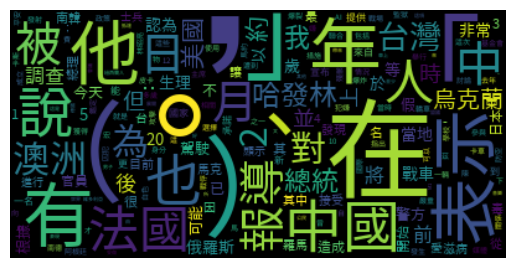

In [24]:
#有處理stop words
wordcloud = WordCloud(font_path='fonts/TaipeiSansTCBeta-Regular.ttf').generate_from_frequencies(seg_stop_counter)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig("result.png")
plt.show()
plt.close()